In [1]:
def compare(A, B):
    x = A.flatten()
    y = B.flatten()
    coef = np.polyfit(x, y, 1)
    poly1d_fn = np.poly1d(coef) 
    plt.plot(x, y, 'o', x, poly1d_fn(x), '--k', alpha=0.2)
    plt.text(min(x), max(y), f"y = {coef[0]:12.8f} * x {coef[1]:+12.8f}")
    plt.show()
    print((np.sqrt(((A - B) ** 2).sum()), np.sqrt(((A - B + coef[1]) ** 2).sum())))

In [2]:
import numpy as np
import gym
import matplotlib.pyplot as plt

from gym.wrappers import TimeLimit
from rltools.environments.modified_frozen_lake import ModifiedFrozenLake

np.set_printoptions(formatter={'float': lambda x: "{0: 8.4f}".format(x)}, edgeitems=10, linewidth=100000)

In [3]:
from rltools.agents import ZLPlus, SARSA, EntRegSARSA, DQN, EntRegDQN, SoftQ, SoftQDP
from rltools.environments.common_frozen import MAPS
from rltools.utils.visualization import display_map, plot_dist

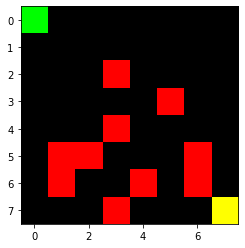

64

In [4]:
# desc, max_step, beta, step_penalization = np.array(['S' + 'F' * 3 + 'G'], dtype='c'), 8, 10, 1/2

# desc = np.array(['FFHFSFFFFFFFFFFFFGFF'], dtype='c')
# desc = np.array(['FFHFSFFFFFFFFFFFFGFF'], dtype='c')
# desc = np.array(['SFFFFFFFFFFFFFFFFFFFFFFFFFFFFG'], dtype='c')
# desc = np.array(MAPS['8x15zigzag'], dtype='c')
# desc = np.array(MAPS['15x15mixed'], dtype='c')
# desc = np.array(MAPS['23x15zigzag'], dtype='c')
# desc = np.array(MAPS['7x32empty'], dtype='c')
# desc = np.array(MAPS['5x24empty'], dtype='c')
# desc = np.array(MAPS['5x17empty'], dtype='c')
# desc = np.array(MAPS['5x15empty'], dtype='c')

# desc, max_step, beta, step_penalization = np.array(MAPS['4x4empty'], dtype='c'), 20, 10, 1
# desc, max_step, beta, step_penalization = np.array(MAPS['5x5empty'], dtype='c'), 4 * 10 + 1, 10, 1/8
# desc, max_step, beta, step_penalization = np.array(MAPS['6x6empty'], dtype='c'), 6 * 10 + 1, 45, 1/12
# desc, max_step, beta, step_penalization = np.array(MAPS['8x8empty'], dtype='c'), 50, 45, 1/20

# desc, max_step, beta, step_penalization = np.array(MAPS['10x10empty'], dtype='c'), 30, 45, 1/20
# desc, max_step, beta, step_penalization = np.array(MAPS['10x10candy'], dtype='c'), 30, 45, 1/20

# desc = np.array(MAPS['10x10candy-x2'], dtype='c')
# desc = np.array(MAPS['10x10candy-x2-nails'], dtype='c')

# desc, max_step, beta, step_penalization = np.array(MAPS['11x11zigzag'], dtype='c'), 16 * 3 + 1, 15, 1/10

# desc = np.array(MAPS['11x11zigzag'], dtype='c')

# desc[desc != b'F'] = b'F'
# desc[0, 0] = b'S'
# # desc[0, 1] = b'H'
# desc[-1, -1] = b'G'
# # desc = desc.T

desc, max_step, beta, step_penalization = np.array(MAPS['8x8'], dtype='c'), 16 * 3 + 1, 45, 1/10
# desc[desc == b'F'] = b'S'

# desc[desc == b'H'] = b'F'
# desc[desc == b'H'] = b'W'

display_map(desc)
nsta = np.prod(desc.shape)
nsta

In [5]:
nact = 5
env = ModifiedFrozenLake(n_action=nact, hot_edges=False, max_reward=0., step_penalization=step_penalization, desc=desc, never_done=False, cyclic_mode=False)
env = TimeLimit(env, max_episode_steps=max_step)

In [6]:
gamma = 1.00
beta = beta
boltzmann_temperature = 1. / beta

In [7]:
agent = SARSA(env, boltzmann_temperature=boltzmann_temperature, gamma=gamma)

In [8]:
%%time
agent.train(10000)

CPU times: user 7.8 s, sys: 57 ms, total: 7.86 s
Wall time: 7.88 s


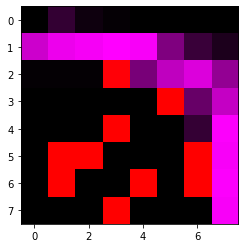

-1.310000000000005


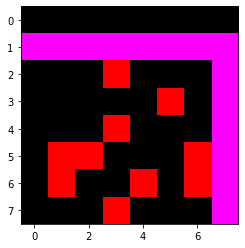

-1.3


In [9]:
print(agent.evaluate(n_episodes=300, greedy=False, show_dist=True, use_log=False))
print(agent.evaluate(n_episodes=1, show_dist=True, use_log=False))